In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import stop_words as sw
import numpy as np
import pandas as pd
from PIL import Image

In [30]:
## Reading each line from the text file while striping the empty lines

with open("t8.shakespeare.txt") as file_in:
    linelist = []
    for eachline in file_in:
        if (eachline.strip()!=""):
            eachline=eachline.strip()
            linelist.append(eachline)
            
## Mining the sonnets from the text file
sonnetslist = []
for line in linelist:
    for i in range (1,155):
        if line==str(i):
            sonnetslist.append(linelist[linelist.index(line)+1:linelist.index(line)+15])
            
sonnetslist= [' '.join(sonnetslist[i]) for i in range(len(sonnetslist))]

In [31]:
## Retrieving the title of all publications

## Retriving Drama title from text file
dramatitlelist=[]
for index, element in enumerate(linelist):
    if element=="by William Shakespeare":  
        dramatitlelist.append(linelist[index-1])
        
## Segregating the genre of the publications

d = {'ALLS WELL THAT ENDS WELL': 'comedy',
 'THE TRAGEDY OF ANTONY AND CLEOPATRA': 'tragedy',
 'AS YOU LIKE IT': 'romance',
 'THE COMEDY OF ERRORS': 'comedy',
 'THE TRAGEDY OF CORIOLANUS': 'tragedy',
 'CYMBELINE': 'tragedy',
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK': 'tragedy',
 'THE FIRST PART OF KING HENRY THE FOURTH': 'history',
 'SECOND PART OF KING HENRY IV': 'history',
 'THE LIFE OF KING HENRY THE FIFTH': 'history',
 'THE FIRST PART OF HENRY THE SIXTH': 'history',
 'THE SECOND PART OF KING HENRY THE SIXTH': 'history',
 'THE THIRD PART OF KING HENRY THE SIXTH': 'history',
 'KING HENRY THE EIGHTH': 'history',
 'KING JOHN': 'history',
 'THE TRAGEDY OF JULIUS CAESAR': 'tragedy',
 'THE TRAGEDY OF KING LEAR': 'tragedy',
 "LOVE'S LABOUR'S LOST": 'comedy',
 'THE TRAGEDY OF MACBETH': 'tragedy',
 'MEASURE FOR MEASURE': 'comedy',
 'THE MERCHANT OF VENICE': 'comedy',
 'THE MERRY WIVES OF WINDSOR': 'comedy',
 "A MIDSUMMER NIGHT'S DREAM": 'comedy',
 'MUCH ADO ABOUT NOTHING': 'comedy',
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE': 'tragedy',
 'KING RICHARD THE SECOND': 'history',
 'KING RICHARD III': 'history',
 'THE TRAGEDY OF ROMEO AND JULIET': 'tragedy',
 'THE TAMING OF THE SHREW': 'comedy',
 'THE TEMPEST': 'comedy',
 'THE LIFE OF TIMON OF ATHENS': 'tragedy',
 'THE TRAGEDY OF TITUS ANDRONICUS': 'tragedy',
 'THE HISTORY OF TROILUS AND CRESSIDA': 'romance',
 'TWELFTH NIGHT; OR, WHAT YOU WILL': 'comedy',
 'THE TWO GENTLEMEN OF VERONA': 'comedy',
 "THE WINTER'S TALE": 'comedy'}

index_list = []
for index,item in enumerate(linelist):
    if item=="by William Shakespeare":
        index_list.append(index-1)
    
drama_content=[]
for i in range(len(index_list)-1):
    drama_content.append(''.join(linelist[index_list[i]:index_list[i+1]]))   
    

dramadf = pd.DataFrame(index=dramatitlelist[1:-1], data = d.values() , columns=['genre'])
dramadf['texts']=drama_content[1:]

In [32]:
dramadf

,genre,texts
ALLS WELL THAT ENDS WELL,comedy,ALLS WELL THAT ENDS WELLby William Shakespeare...
THE TRAGEDY OF ANTONY AND CLEOPATRA,tragedy,THE TRAGEDY OF ANTONY AND CLEOPATRAby William ...
AS YOU LIKE IT,romance,AS YOU LIKE ITby William ShakespeareDRAMATIS P...
THE COMEDY OF ERRORS,comedy,THE COMEDY OF ERRORSby William Shakespeare<<TH...
THE TRAGEDY OF CORIOLANUS,tragedy,THE TRAGEDY OF CORIOLANUSby William Shakespear...
CYMBELINE,tragedy,CYMBELINEby William ShakespeareDramatis Person...
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",tragedy,"THE TRAGEDY OF HAMLET, PRINCE OF DENMARKby Wil..."
THE FIRST PART OF KING HENRY THE FOURTH,history,THE FIRST PART OF KING HENRY THE FOURTHby Will...
SECOND PART OF KING HENRY IV,history,SECOND PART OF KING HENRY IVby William Shakesp...
THE LIFE OF KING HENRY THE FIFTH,history,THE LIFE OF KING HENRY THE FIFTHby William Sha...


In [33]:
## Sonnets Dataframe

datainsert = ["sonnet"] * 154
sonnet_index=[]
for i in range(1,155):
    sonnet_index.append("sonnet "+str(i))
    

sonnetsdf = pd.DataFrame(index=sonnet_index, data = datainsert, columns=['genre'])
sonnetsdf['texts']=sonnetslist

sonnetsdf

,genre,texts
sonnet 1,sonnet,"From fairest creatures we desire increase, Tha..."
sonnet 2,sonnet,"When forty winters shall besiege thy brow, And..."
sonnet 3,sonnet,Look in thy glass and tell the face thou viewe...
sonnet 4,sonnet,"Unthrifty loveliness why dost thou spend, Upon..."
sonnet 5,sonnet,Those hours that with gentle work did frame Th...
...,...,...
sonnet 150,sonnet,O from what power hast thou this powerful migh...
sonnet 151,sonnet,"Love is too young to know what conscience is, ..."
sonnet 152,sonnet,"In loving thee thou know'st I am forsworn, But..."
sonnet 153,sonnet,"Cupid laid by his brand and fell asleep, A mai..."


In [35]:
## Adding the poem to the drama dataframe

for index,item in enumerate(linelist):
    if item=="A LOVER'S COMPLAINT":
        row = ["romance", " ".join(linelist[index:-1])]

dramadf.loc["A LOVER'S COMPLAINT"] = row
dramadf

,genre,texts
ALLS WELL THAT ENDS WELL,comedy,ALLS WELL THAT ENDS WELLby William Shakespeare...
THE TRAGEDY OF ANTONY AND CLEOPATRA,tragedy,THE TRAGEDY OF ANTONY AND CLEOPATRAby William ...
AS YOU LIKE IT,romance,AS YOU LIKE ITby William ShakespeareDRAMATIS P...
THE COMEDY OF ERRORS,comedy,THE COMEDY OF ERRORSby William Shakespeare<<TH...
THE TRAGEDY OF CORIOLANUS,tragedy,THE TRAGEDY OF CORIOLANUSby William Shakespear...
CYMBELINE,tragedy,CYMBELINEby William ShakespeareDramatis Person...
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",tragedy,"THE TRAGEDY OF HAMLET, PRINCE OF DENMARKby Wil..."
THE FIRST PART OF KING HENRY THE FOURTH,history,THE FIRST PART OF KING HENRY THE FOURTHby Will...
SECOND PART OF KING HENRY IV,history,SECOND PART OF KING HENRY IVby William Shakesp...
THE LIFE OF KING HENRY THE FIFTH,history,THE LIFE OF KING HENRY THE FIFTHby William Sha...


In [36]:
final_df = sonnetsdf.append(dramadf[:-1])
final_df

,genre,texts
sonnet 1,sonnet,"From fairest creatures we desire increase, Tha..."
sonnet 2,sonnet,"When forty winters shall besiege thy brow, And..."
sonnet 3,sonnet,Look in thy glass and tell the face thou viewe...
sonnet 4,sonnet,"Unthrifty loveliness why dost thou spend, Upon..."
sonnet 5,sonnet,Those hours that with gentle work did frame Th...
...,...,...
THE TRAGEDY OF TITUS ANDRONICUS,tragedy,THE TRAGEDY OF TITUS ANDRONICUSby William Shak...
THE HISTORY OF TROILUS AND CRESSIDA,romance,THE HISTORY OF TROILUS AND CRESSIDAby William ...
"TWELFTH NIGHT; OR, WHAT YOU WILL",comedy,"TWELFTH NIGHT; OR, WHAT YOU WILLby William Sha..."
THE TWO GENTLEMEN OF VERONA,comedy,THE TWO GENTLEMEN OF VERONAby William Shakespe...


In [37]:
## Giving Multi indexing to dataframe

outside = ["sonnets"]*154
inside = [i for i in sonnetsdf.index]

hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

sonnets_df = pd.DataFrame(data= [i for i in sonnetsdf['genre']] ,index=hier_index, columns=["genre"])

In [38]:
sonnets_df['texts']= [i for i in sonnetsdf['texts']]
sonnets_df

genre                                              texts
sonnets sonnet 1    sonnet  From fairest creatures we desire increase, Tha...
        sonnet 2    sonnet  When forty winters shall besiege thy brow, And...
        sonnet 3    sonnet  Look in thy glass and tell the face thou viewe...
        sonnet 4    sonnet  Unthrifty loveliness why dost thou spend, Upon...
        sonnet 5    sonnet  Those hours that with gentle work did frame Th...
...                    ...                                                ...
        sonnet 150  sonnet  O from what power hast thou this powerful migh...
        sonnet 151  sonnet  Love is too young to know what conscience is, ...
        sonnet 152  sonnet  In loving thee thou know'st I am forsworn, But...
        sonnet 153  sonnet  Cupid laid by his brand and fell asleep, A mai...
        sonnet 154  sonnet  The little Love-god lying once asleep, Laid by...

[154 rows x 2 columns]

In [39]:
## Giving Multi indexing to dataframe

outside = ["drama"]*37
inside = [i for i in dramadf.index]

hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

drama_df = pd.DataFrame(data= [i for i in dramadf['genre']] ,index=hier_index, columns=["genre"])
drama_df['texts']= [i for i in dramadf['texts']]
drama_df = drama_df[:-1]
drama_df

genre  \
drama ALLS WELL THAT ENDS WELL                   comedy   
      THE TRAGEDY OF ANTONY AND CLEOPATRA       tragedy   
      AS YOU LIKE IT                            romance   
      THE COMEDY OF ERRORS                       comedy   
      THE TRAGEDY OF CORIOLANUS                 tragedy   
      CYMBELINE                                 tragedy   
      THE TRAGEDY OF HAMLET, PRINCE OF DENMARK  tragedy   
      THE FIRST PART OF KING HENRY THE FOURTH   history   
      SECOND PART OF KING HENRY IV              history   
      THE LIFE OF KING HENRY THE FIFTH          history   
      THE FIRST PART OF HENRY THE SIXTH         history   
      THE SECOND PART OF KING HENRY THE SIXTH   history   
      THE THIRD PART OF KING HENRY THE SIXTH    history   
      KING HENRY THE EIGHTH                     history   
      KING JOHN                                 history   
      THE TRAGEDY OF JULIUS CAESAR              tragedy   
      THE TRAGEDY OF KING LEAR                  tragedy   
      LOVE'S LABOUR'S LOST                       comedy   
      THE TRAGEDY OF MACBETH                    tragedy   
      MEASURE FOR MEASURE                        comedy   
      THE MERCHANT OF VENICE                     comedy   
      THE MERRY WIVES OF WINDSOR                 comedy   
      A MIDSUMMER NIGHT'S DREAM                  comedy   
      MUCH ADO ABOUT NOTHING                     comedy   
      THE TRAGEDY OF OTHELLO, MOOR OF VENICE    tragedy   
      KING RICHARD THE SECOND                   history   
      KING RICHARD III                          history   
      THE TRAGEDY OF ROMEO AND JULIET           tragedy   
      THE TAMING OF THE SHREW                    comedy   
      THE TEMPEST                                comedy   
      THE LIFE OF TIMON OF ATHENS               tragedy   
      THE TRAGEDY OF TITUS ANDRONICUS           tragedy   
      THE HISTORY OF TROILUS AND CRESSIDA       romance   
      TWELFTH NIGHT; OR, WHAT YOU WILL           comedy   
      THE TWO GENTLEMEN OF VERONA                comedy   
      THE WINTER'S TALE                          comedy   

                                                                                            texts  
drama ALLS WELL THAT ENDS WELL                  ALLS WELL THAT ENDS WELLby William Shakespeare...  
      THE TRAGEDY OF ANTONY AND CLEOPATRA       THE TRAGEDY OF ANTONY AND CLEOPATRAby William ...  
      AS YOU LIKE IT                            AS YOU LIKE ITby William ShakespeareDRAMATIS P...  
      THE COMEDY OF ERRORS                      THE COMEDY OF ERRORSby William Shakespeare<<TH...  
      THE TRAGEDY OF CORIOLANUS                 THE TRAGEDY OF CORIOLANUSby William Shakespear...  
      CYMBELINE                                 CYMBELINEby William ShakespeareDramatis Person...  
      THE TRAGEDY OF HAMLET, PRINCE OF DENMARK  THE TRAGEDY OF HAMLET, PRINCE OF DENMARKby Wil...  
      THE FIRST PART OF KING HENRY THE FOURTH   THE FIRST PART OF KING HENRY THE FOURTHby Will...  
      SECOND PART OF KING HENRY IV              SECOND PART OF KING HENRY IVby William Shakesp...  
      THE LIFE OF KING HENRY THE FIFTH          THE LIFE OF KING HENRY THE FIFTHby William Sha...  
      THE FIRST PART OF HENRY THE SIXTH         THE FIRST PART OF HENRY THE SIXTHby William Sh...  
      THE SECOND PART OF KING HENRY THE SIXTH   THE SECOND PART OF KING HENRY THE SIXTHby Will...  
      THE THIRD PART OF KING HENRY THE SIXTH    THE THIRD PART OF KING HENRY THE SIXTHby Willi...  
      KING HENRY THE EIGHTH                     KING HENRY THE EIGHTHby William ShakespeareDRA...  
      KING JOHN                                 KING JOHNby William ShakespeareDRAMATIS PERSON...  
      THE TRAGEDY OF JULIUS CAESAR              THE TRAGEDY OF JULIUS CAESARby William Shakesp...  
      THE TRAGEDY OF KING LEAR                  THE TRAGEDY OF KING LEARby William Shakespeare...  
      LOVE'S LABOUR'S LOST                      LOVE'S LABOUR'S LO

In [40]:
final_df = sonnets_df.append(drama_df)
final_df

genre  \
sonnets sonnet 1                              sonnet   
        sonnet 2                              sonnet   
        sonnet 3                              sonnet   
        sonnet 4                              sonnet   
        sonnet 5                              sonnet   
...                                              ...   
drama   THE TRAGEDY OF TITUS ANDRONICUS      tragedy   
        THE HISTORY OF TROILUS AND CRESSIDA  romance   
        TWELFTH NIGHT; OR, WHAT YOU WILL      comedy   
        THE TWO GENTLEMEN OF VERONA           comedy   
        THE WINTER'S TALE                     comedy   

                                                                                         texts  
sonnets sonnet 1                             From fairest creatures we desire increase, Tha...  
        sonnet 2                             When forty winters shall besiege thy brow, And...  
        sonnet 3                             Look in thy glass and tell the face thou viewe...  
        sonnet 4                             Unthrifty loveliness why dost thou spend, Upon...  
        sonnet 5                             Those hours that with gentle work did frame Th...  
...                                                                                        ...  
drama   THE TRAGEDY OF TITUS ANDRONICUS      THE TRAGEDY OF TITUS ANDRONICUSby William Shak...  
        THE HISTORY OF TROILUS AND CRESSIDA  THE HISTORY OF TROILUS AND CRESSIDAby William ...  
        TWELFTH NIGHT; OR, WHAT YOU WILL     TWELFTH NIGHT; OR, WHAT YOU WILLby William Sha...  
        THE TWO GENTLEMEN OF VERONA          THE TWO GENTLEMEN OF VERONAby William Shakespe...  
        THE WINTER'S TALE                    THE WINTER'S TALEby William ShakespeareDramati...  

[190 rows x 2 columns]

Part 1) Do a word Cloud of all of Shakespeare's works (remove stopwords and, optionally, stem and lemmatize). You may use a python library of your choice. What's the average number of words per sentence (note: for poems, consider each line to be a separate sentence)? What's the average number of words per sentence per type of publication (drama, comedy, history, poem)?

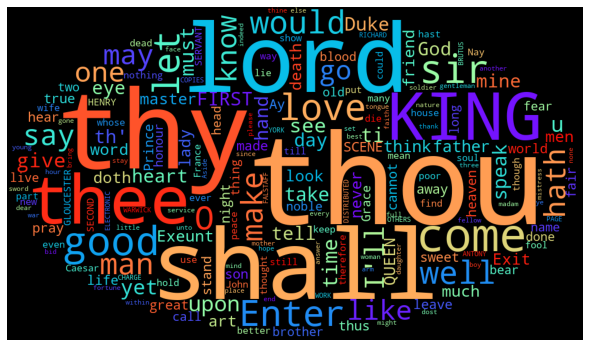

In [41]:
with open("stopwords.txt") as file_in:
    stopwordslist = []
    for eachline in file_in:
        eachline=eachline.strip()
        stopwordslist.append(eachline)
        
#stop_words = sw.get_stop_words('english')
file = open("t8.shakespeare.txt")
line =file.read()
words = line.split()
for r in words:
    if not r in stopwordslist:
        appendFile = open('filteredtext.txt', 'a')
        appendFile.write(" " + r)
        appendFile.close()
with open('filteredtext.txt', 'r') as txt_file:
    filteredtext = txt_file.read()
    
def wordcloud(text,stopwordss):
    # Set figure size
    my_mask = np.array(Image.open('mask_image.png'))
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black',
                        colormap='rainbow', collocations=False, 
                             stopwords=stopwordss,mask=my_mask).generate(text)
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()    
    
    
wordcloud(filteredtext,stopwordslist)

In [42]:
drama_sentences = " ".join([i for i in final_df['texts']['drama']])

In [43]:
import nltk
start = linelist.index("THE SONNETS")
end = linelist.index("THE END")
count_sonnet_list = []
for each in linelist[start+2:end-1]:
    if each != str(range(154)):
        count_sonnet_list.append(len((nltk.word_tokenize(each)))-1) ## -1 to remove the comma in the end of the line
        
        
print("avg no.of words per sentence in sonnet =", sum(count_sonnet_list)/len(count_sonnet_list))

avg no.of words per sentence in sonnet = 7.956672443674177


In [44]:
drama_word_count = []
for i in range(len(final_df['texts']['drama'])):
    tokens = nltk.sent_tokenize(final_df['texts']['drama'][i])
    for t in tokens:
        drama_word_count.append(len(nltk.word_tokenize(t)))

total_word_count = count_sonnet_list+drama_word_count
print("Avg no.of words per sentences =", sum(total_word_count)/len(total_word_count))
    

Avg no.of words per sentences = 18.745257253881263


In [45]:
def genre_word_count(genre):    
    word_count = []
    for index, item in enumerate(final_df[(final_df['genre']==genre)]['texts']):
         tokens = nltk.sent_tokenize(final_df['texts']['drama'][index])
         for t in tokens:  
            word_count.append(len(nltk.word_tokenize(t)))

    print( "Avg word_count per sentence of {} genre is {}".format(genre,sum(word_count)/len(word_count)))
    
genre_word_count("comedy")
genre_word_count("romance")
genre_word_count("tragedy")
genre_word_count("history")

Avg word_count per sentence of comedy genre is 19.71663452755506
Avg word_count per sentence of romance genre is 15.980043739748496
Avg word_count per sentence of tragedy genre is 18.86590214948424
Avg word_count per sentence of history genre is 18.410646620217577


Part 2)
What's the probability that Shakespeare asks a question?
What's the distribution of the number of questions for all his works? What's the distribution of the number of questions based on genre (comedies, tragedies, histories, sonnets)? Note that sonnets (poems) don't have many questions, so you may not find any in that genre.
What well known probability distributions could you match each one with? If not possible, how could you simplify the problem (maybe get rid of some outliers?) to answer this question? 

In [46]:
## Part 2

def sentences_counter(text: str,end_of_sentence: str):

    # complete with whatever end of a sentence punctuation mark I might have forgotten
    # you might for instance want to add '\n'.

    sentences_count = 0
    sentences = []
    inside_a_quote = False
    
    start_of_sentence = 0
    last_end_of_sentence = -2
    for i, char in enumerate(text):
        
        # quote management, to solve your issue
        if char == '"':
            inside_a_quote = not inside_a_quote
            if not inside_a_quote and text[i-1] in end_of_sentence:
                last_end_of_sentence = i 
        elif inside_a_quote:
            continue

        # basic management of sentences with the punctuation marks in `end_of_sentence`
        if char in end_of_sentence:
            last_end_of_sentence = i
        elif last_end_of_sentence == i-1:
            sentences.append(text[start_of_sentence:i].strip())
            sentences_count += 1
            start_of_sentence = i
    
    # same as the last block in case there is no end punctuation mark in the text
    last_sentence = text[start_of_sentence:]
    if last_sentence:
        sentences.append(last_sentence.strip())
        sentences_count += 1
    
    return sentences_count, sentences

In [48]:
questionCount = {'comedy':0,'tragedy':0,'history':0,'sonnet':0,'romance':0}
sentenceCount = {'comedy':0,'tragedy':0,'history':0,'sonnet':0, 'romance':0}

for i in final_df['texts']['drama']:
    dramaTexts = i.split("<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAMSHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND ISPROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGEWITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BEDISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERSPERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USEDCOMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANYSERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>")
    titleGenre = d[dramaTexts[0].split("by William Shakespeare")[0]]
    dramaTexts.pop(0)
    for text in dramaTexts:
        sentences_count, sentences = sentences_counter(text,".?!")
        sentenceCount[titleGenre] = sentenceCount[titleGenre] + (sentences_count/2)
        #print(sentenceCount[titleGenre])
        for sentence in sentences:
            if "?" in sentence:
                questionCount[titleGenre] = questionCount[titleGenre]+1
                 
                
for sonnetTexts in final_df['texts']['sonnets']:
    sentences_count, sentences = sentences_counter(sonnetTexts,".?!:;,")
    sentenceCount['sonnet'] = sentenceCount['sonnet'] + sentences_count
    for sentence in sentences:
        if "?" in sentence:
            x=0
            questionCount['sonnet'] = questionCount['sonnet']+1

#Total probablity of Shakessphere asking a question
print("Total probablity of Shakessphere asking a question")
print((questionCount['sonnet']+questionCount['comedy']+questionCount['tragedy']+questionCount['history']+questionCount['romance'])/(sentenceCount['sonnet']+sentenceCount['comedy']+sentenceCount['tragedy']+sentenceCount['history']+sentenceCount['romance']))

# #Total probablity of Shakessphere asking a question in comedy
print("Probablity of asking a question in comedy genre")
comedy = questionCount['comedy']/sentenceCount['comedy']
print(questionCount['comedy']/sentenceCount['comedy'])

#Total probablity of Shakessphere asking a question in tragedy
print("Probablity of asking a question in tragedy genre")
tragedy = questionCount['tragedy']/sentenceCount['tragedy']
print(questionCount['tragedy']/sentenceCount['tragedy'])

#Total probablity of Shakessphere asking a question in history
print("Probablity of asking a question in history genre")
history = questionCount['history']/sentenceCount['history']
print(questionCount['history']/sentenceCount['history'])

#Total probablity of Shakessphere asking a question in sonnets
print("Probablity of asking a question in romance genre")
romance = questionCount['romance']/sentenceCount['romance']
print(questionCount['romance']/sentenceCount['romance'])

#Total probablity of Shakessphere asking a question in sonnets
print("Probablity of asking a question in sonnet")
sonnet = questionCount['sonnet']/sentenceCount['sonnet']
print(questionCount['sonnet']/sentenceCount['sonnet'])


Total probablity of Shakessphere asking a question
0.20703125
Probablity of asking a question in comedy genre
0.213734335839599
Probablity of asking a question in tragedy genre
0.2134898409104451
Probablity of asking a question in history genre
0.22086292540744695
Probablity of asking a question in romance genre
0.2296551724137931
Probablity of asking a question in sonnet
0.03561749903213318


<BarContainer object of 5 artists>

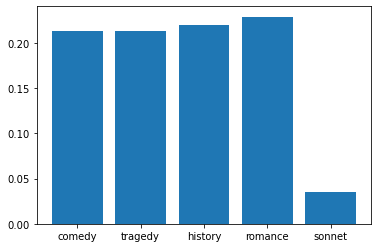

In [50]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
 
x = ["comedy", "tragedy", "history", "romance", "sonnet"]
y= [0.213,0.213,0.220,0.229,0.035]

plt.bar(x,y)

The probability dist. for different genres in shakespeare's work follows same values of excepted questions for almost all genres. thus by, we can assume them that it follows UNIFORM DISTRIBUTION.

Part 3)
Do a sentiment analysis of Shakespeare's sentences and find the sentiment distribution per genre (comedies, tragedies, histories, sonnets). You can do that by downloading a library that can classify each sentence into different sentiments. I think most sentiment analysis libraries classify in 6 main sentiments, but if you can find a library that distinguishes between more than 6, you are welcome to use that! What kind of model could you match these distributions? Can you find the model's parameters? Are they different based on genre?


In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [53]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1



In [54]:
comedy_sentiment_count = []
for index, item in enumerate(final_df[(final_df['genre']=="comedy")]['texts']):
    tokens = nltk.sent_tokenize(final_df['texts']['drama'][index])
    for i in tokens:
        comedy_sentiment_count.append(sentiment_score(i))




C:\Users\sanje\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comedy', ylabel='Density'>

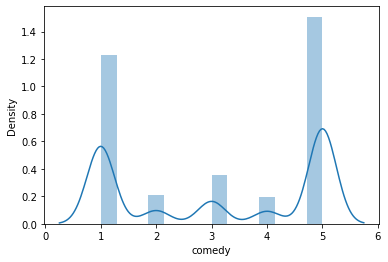

In [55]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
dataframe = pd.DataFrame(data = comedy_sentiment_count, columns = ['comedy'])
sns.distplot(dataframe['comedy'])

In [56]:
romance_sentiment_count = []
for index, item in enumerate(final_df[(final_df['genre']=="romance")]['texts']):
    tokens = nltk.sent_tokenize(final_df['texts']['drama'][index])
    for i in tokens:
        romance_sentiment_count.append(sentiment_score(i))


C:\Users\sanje\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='romance', ylabel='Density'>

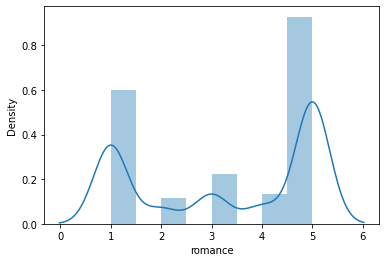

In [57]:
dataframe = pd.DataFrame(data = romance_sentiment_count, columns = ['romance'])
sns.distplot(dataframe['romance'])

In [58]:
tragedy_sentiment_count = []
for index, item in enumerate(final_df[(final_df['genre']=="tragedy")]['texts']):
    tokens = nltk.sent_tokenize(final_df['texts']['drama'][index])
    for i in tokens:
        tragedy_sentiment_count.append(sentiment_score(i))

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tragedy', ylabel='Density'>

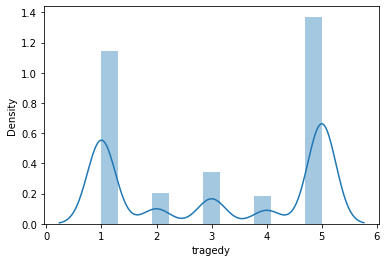

In [59]:
dataframe = pd.DataFrame(data = tragedy_sentiment_count, columns = ['tragedy'])
sns.distplot(dataframe['tragedy'])

In [60]:
history_sentiment_count = []
for index, item in enumerate(final_df[(final_df['genre']=="history")]['texts']):
    tokens = nltk.sent_tokenize(final_df['texts']['drama'][index])
    for i in tokens:
        history_sentiment_count.append(sentiment_score(i))


C:\Users\sanje\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='history', ylabel='Density'>

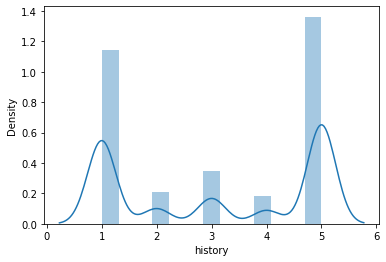

In [61]:
dataframe = pd.DataFrame(data = history_sentiment_count, columns = ['history'])
sns.distplot(dataframe['history'])

It follows Bimodal distribution.

Part 4)
Do a time series analysis for each genre (i.e. one for drama, one for comedy, etc.) of the 6 main sentiments. Smooth out the time series with a method of your choice, to get rid of noise. What can you conclude about sentiment in Shakespeare's works? What's your favorite work, and why?


<AxesSubplot:xlabel='values', ylabel='comedy'>

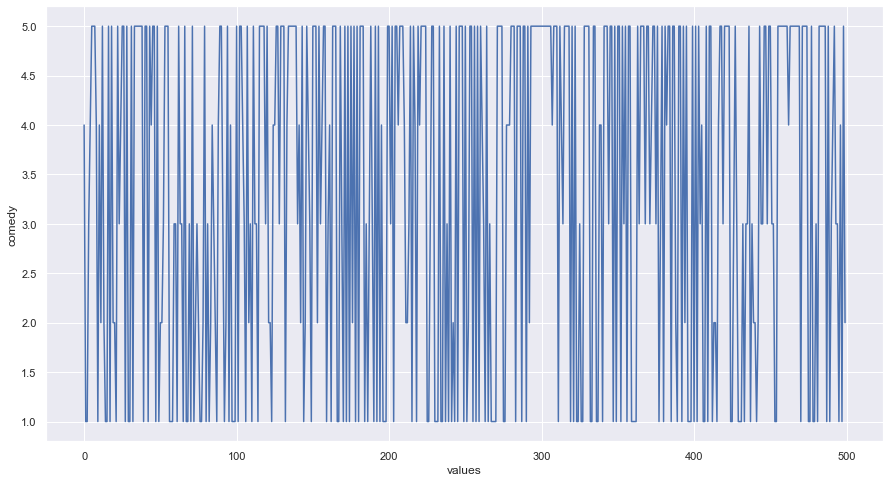

In [92]:
dataframe = pd.DataFrame(data=comedy_sentiment_count[:500] ,columns=['comedy'])
dataframe.reset_index(inplace=True)
dataframe = dataframe.rename(columns = {'index':'values'})
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot( x = "values", y = "comedy", data =dataframe )

<AxesSubplot:xlabel='values', ylabel='romance'>

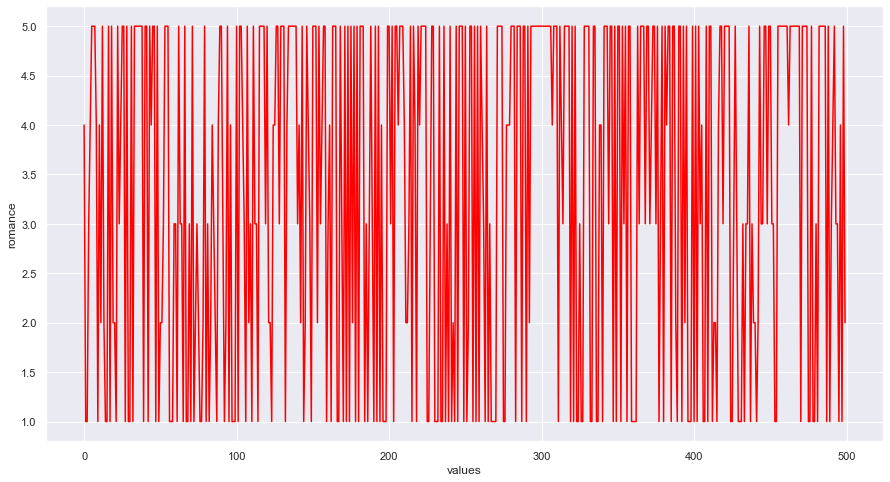

In [94]:
dataframe = pd.DataFrame(data=romance_sentiment_count[:500] ,columns=['romance'])
dataframe.reset_index(inplace=True)
dataframe = dataframe.rename(columns = {'index':'values'})
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot( x = "values", y = "romance", color = 'red',data =dataframe )

<AxesSubplot:xlabel='values', ylabel='tragedy'>

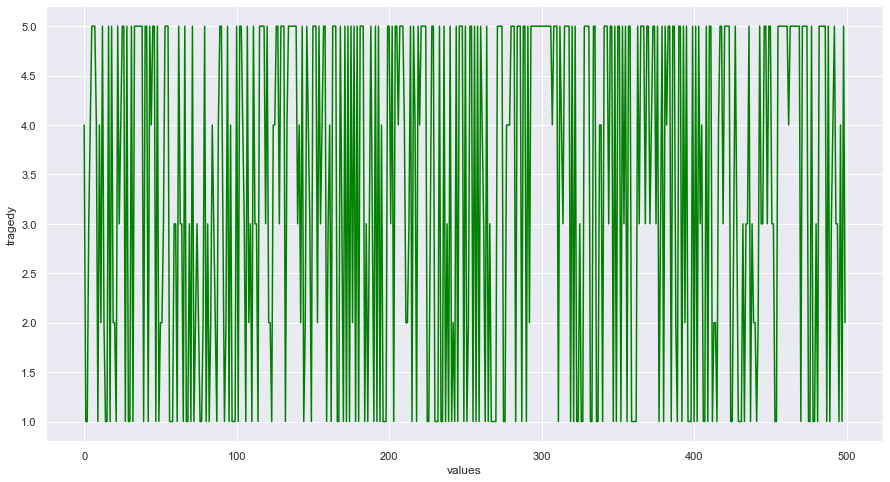

In [96]:
dataframe = pd.DataFrame(data=tragedy_sentiment_count[:500] ,columns=['tragedy'])
dataframe.reset_index(inplace=True)
dataframe = dataframe.rename(columns = {'index':'values'})
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot( x = "values", y = "tragedy",color='green' ,data =dataframe )

<AxesSubplot:xlabel='values', ylabel='history'>

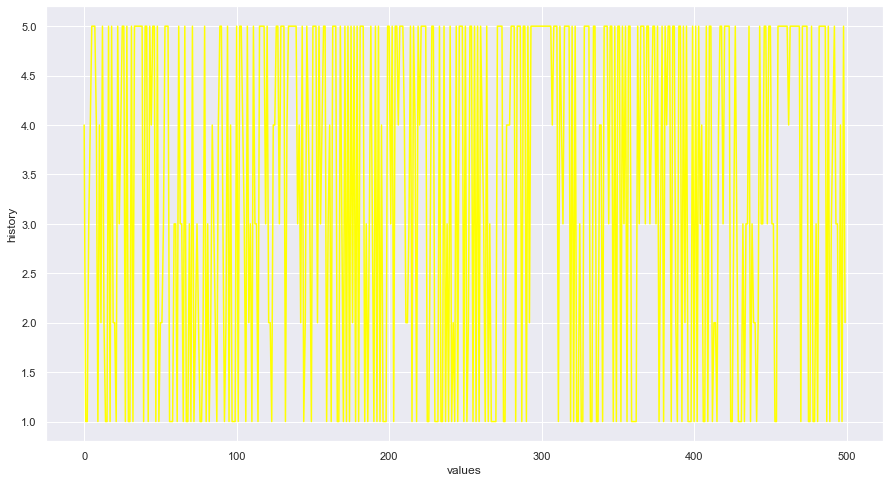

In [97]:
dataframe = pd.DataFrame(data=history_sentiment_count[:500] ,columns=['history'])
dataframe.reset_index(inplace=True)
dataframe = dataframe.rename(columns = {'index':'values'})
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot( x = "values", y = "history",color='yellow', data =dataframe )